<img style="margin-top: 0px" src=" 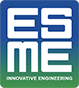" align="left" alt="logo esme"  height="20"> 
<div class="alert alert-block alert-info" style="margin-top: 10px; padding: 10px; background: linear-gradient(to right, #f7f9fa, #d9edfb);">
    <h1 style="margin-left: 85px"> Advanced Algorithms 1 - Course 04 - Hash tables</h1>
</div>

<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>Introduction</h2>
</div>

<div style='color: forestgreen'>
    <h3>Why hashing? </h3>
</div>

Lists (arrays) are a very powerful mechanism for classifying information in Python, as in other languages.

**That said, they have one major drawback**: when you want to read what they contain, you can't access an element whose index you don't know, _in a single step_.


You have to go through the list, advancing from element to element until you find the one you're looking for. This poses performance problems as soon as the list becomes large.

> Imagine a list of 1000 000 elements, where the one you're looking for is at the end...

<div style="border-color: rgba(40, 167, 70, 0.294); margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid rgba(40, 167, 70, 0.294); border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: rgba(40,167,70,0.1); position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">💡 Information</p>
    <p>
      Let's imagine a list that contains information about students: <em>their name, their age and their average</em>. Each student will be represented by a sublist.
        
If we want to find the information on <em><strong>Luc Doncieux</strong></em> in the following figure, we will have to go through the entire list to realize that he is at the end!
    </p>
    <p><img src=" 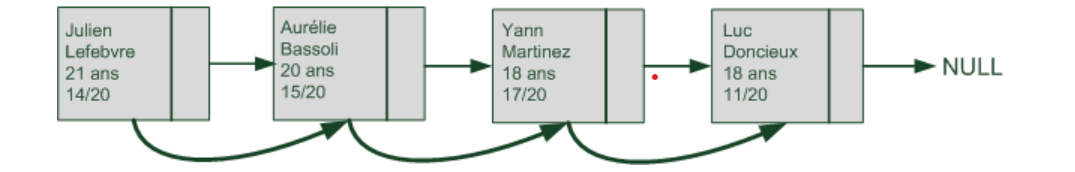"></p>
</div>

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">Of course, if we had searched for <em><strong>Julien Lefebvre</strong></em>, it would have been much faster since he is at the beginning of the list. However, to evaluate the effectiveness of an algorithm, we must always consider <strong>the worst case</strong>.</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">Here, we say that the algorithm for finding an element has a complexity in <strong>O(n)</strong>, because if the list is of size <em>n</em>, it is necessary to go through all the list to find a given element (in the worst case where it is at the end). If the list contains <strong><em>9 elements</em></strong>, it will take <strong><em>9 iterations</em></strong> at most to find an element.</p>
</div>

In the previous example, our linked list contains only four elements. The computer will find _Luc Doncieux_ very quickly.


But now imagine that he's at the end of a list containing 10 000 000 elements. It's not acceptable to have to go through 10 000 000 elements to find a piece of information. That's where hash tables come in.

<div style='color: forestgreen'>
    <h3>Hash tables and arrays</h3>
</div>

In a table, cells are identified by numbers called _indices_. Asking the computer: "Tell me what data is in the "Luc Doncieux" box" is not possible in all programming languages.

<div style="border-color: #B404AE; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid #B404AE; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #DF01D7; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700; color: white">🧠 Culture</p>
<p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;"> Programming languages like Python or PHP have data structures that allow values to be found by having character strings instead of indices. They are called <strong>dictionaries</strong> or <strong>associative tables</strong>.<br><br>
But other languages like C or C++ do not have such structures.
</p>
</div>

In Algorithms, we try to solve problems by doing without the "facilities" offered by particular programming languages. We'll assume that dictionaries don't exist. Our pseudo code can thus be adapted to any programming language.

<div style='color: forestgreen'>
    <h3>What data structures can be used to search for values efficiently?</h3>
</div>

<div style='color: cadetblue'>
    <h4> 💡 Dictionaries?</h4>
</div>

Hardly generalizable outside specific languages (PHP, Python) or external libraries (Java and the HashMap class). What's more, how can we be sure of the **algorithmic complexity** of the operations?

<div style='color: cadetblue'>
    <h4> 💡 Arrays ?</h4>
</div>

Yes, but this raises two questions:

- What if the keys used to access the values are not integers?
- What if the data is scattered all over the available space?
- In addition, there's the problem of sequential searching (dichotomous searching only works for sorted lists).

<div style='color: forestgreen'>
    <h3>To summarize</h3>
</div>

We are looking for a data structure capable of organizing _key/value_ data pairs for which we wish to perform operations:

- add
- search
- deletion (optional)

And do so **very efficiently**.

<div style="border-color: rgba(40, 167, 70, 0.294); margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid rgba(40, 167, 70, 0.294); border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: rgba(40,167,70,0.1); position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">💡 Information</p>
    <p>
        We say that the complexity of accessing information in a hash table is in <strong>O(1)</strong> because we find the element we're looking for directly.


In fact, the hash function returns an index: all you have to do is "jump" directly to the corresponding cell in the table. No need to go through all the cells one by one!
    </p>
</div>

<div style='color: forestgreen'>
    <h3>Hash tables: formal definition</h3>
</div>

Let $U$ be the set of possible values corresponding to a universe of keys, and let $K$ be a subset of $U$, representing the set of values actually used.


A **hash table** is a table whose :

- Elements are placed in cells.

- The choice of cell for each element is made by applying a function to a value: this is the **hash function**.


<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>Using a hash table</h2>
</div>

Let's imagine we want to use the structure of **hash tables** to store **100** names.

We need to write a function which, given a name, generates a number between _0_ and _99_ (the array indices).

This is where we need to get inventive. There are very complex mathematical methods for "chopping" data, i.e. transforming it into numbers.

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
<p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
   Some algorithms like <strong><em>MD5</em></strong> and <strong><em>SHA1</em></strong> are famous hash functions, but we will implement techniques to write our own hash functions.
</p>
</div>

<div style='color: forestgreen'>
    <h3>Simple hash function with strings</h3>
</div>

Here, to keep things simple, we propose simply adding up the ASCII values of each letter in the name, i.e. for _Bob_ add up the following:

**ascii code of B + ascii code of o + ascii code of b**.

<div style="border-color: #B404AE; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid #B404AE; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #DF01D7; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700; color: white">🧠 Culture</p>
<p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
 The <strong>ASCII code</strong> is one of the oldest codes still used to represent Latin characters. For each character, it uses a sequence of 8 bits which form a byte (see numerical analysis).

The character <strong>A</strong> is represented in the form of a byte (sequence of 8 bits) with the values: 0 1 0 0 0 0 0 1 in binary or <strong>65</strong> in decimal .

The character <strong>B</strong> is represented in the form of a byte (sequence of 8 bits) with the values: 0 1 0 0 0 0 1 0 in binary or <strong>66</strong> in decimal .

...etc...
</p>
</div>

Bob in ASCII coding gives the following sequence of bytes:

    01000010 = B represented by the ASCII code value 66
    01101111 = o represented by ASCII code 111
    01100010 = b represented by ASCII code 98

**Recall the problem**: We want to store **100 first names** in a hash table with a capacity of **100 elements**.


However, we're going to have a problem with Bob: the sum of his ascii characters exceeds 100! As our table is only 100 cells long, if we stick to that, we risk going outside the limits of the table.

Remember that each letter in the ASCII table can be numbered up to 255. So it's easy to exceed 100...

**To solve the problem, we can use the modulo operator `%`. It gives the remainder of the division.**

If we do the calculation :

```python
sommelettres % 100
```

... you'll get a number between **0** and **99**.

> For example, if the sum is 3428, the remainder of division by _100_ is _28_. The **hash function** will therefore return _28_.

In [1]:
sommelettres = 3428
print(sommelettres % 100)

28


<div style="border-color: #fd7e14; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #fd7e14; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #ffedcc; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">🚧 Course questions</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">Using the modulo method, find the hash value of the string "Bob" if we use the sum of the ascii values of each character. </p>
</div>

<div style="border-color: rgba(40, 167, 70, 0.294); margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid rgba(40, 167, 70, 0.294); border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: rgba(40,167,70,0.1); position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">💡 Information</p>
    <p>
        <strong>The modulo is very practical for "going in circles" among a set of values.</strong>
         We can do modulo 100 to have values from 0 to 99 or modulo 9 to have values from 0 to 8.
         <blockquote>
             Generally using our hash function modulo <strong><em>m</em></strong> will limit our values between <strong>0</strong> and <strong>m-1</strong>
        </blockquote>
    </p>
</div>

Thanks to the **hash function**, you know in which cell of your array to place your data.

When you need to access the right cell to retrieve the data, simply hash the person's name to find the index of the table cell where their information is stored.

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
        The difficulty lies in writing a correct hash function. How do you transform a string of characters into a unique number?</p>

<p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">First of all, <strong>let's get one thing straight </strong>: a hash table can contain several tens of thousands or even several hundred thousand boxes. However, no matter the size of the array, searching for the element will be <strong>as fast</strong>.</p>
</div>

<div style='color: forestgreen'>
    <h3>Another example of hashing</h3>
</div>

Instead of using the ASCII code, we could have used the **ordinal value** of each letter. Here's an example:

Let $E$ be a set of names, assume that the key is the name itself and that each element $x$ of the set $E$ is associated with a number $h(x)$ between **0** and **8** as follows:

- Assign the letters **_a, b, c, ..., z_** in the name their respective **ordinal value**, i.e. **_1, 2, 3, ..., 26_**.


- Let's add up the values of the letters in the name.



For the set  _E = { nathalie, caroline, arnaud, reda, mathieu, jerome, nicolas }_ , we obtain the following hash values :

<img src=" 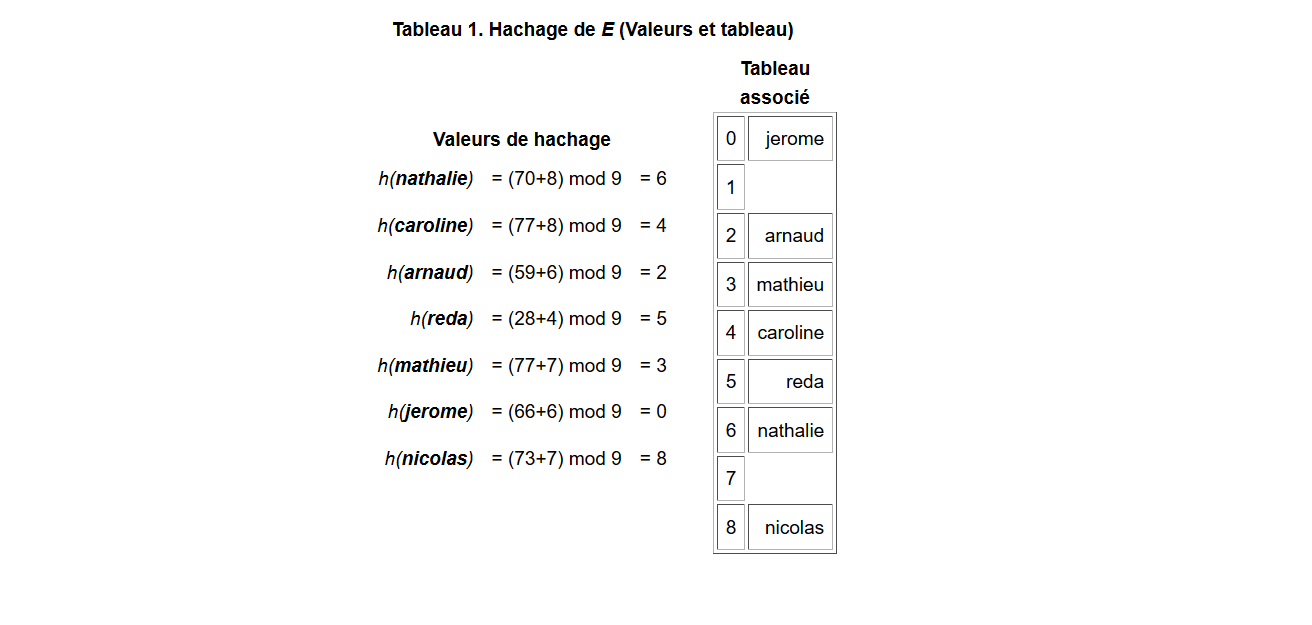" height="250">

<div style='color: forestgreen'>
    <h3>To summarize</h3>
</div>

In an ideal case, we can see that the restriction of $h$ to $E$ is injective and that we can therefore arrange each element $x$ of $E$ in the element of index $h(x)$ of the array.

If we wish to add an element $x$ and it has a hash value already used by an element $y$, $h$ is no longer **_injective_** . 
(we'd have $x != y$ and $h(x)$ = $h(y)$).

In this case, there is a **primary collision** between $x$ and $y$.

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;"><strong>There is no universal hash function</strong>. Each hash function must be adapted to the data it must manipulate and the application that manages it.</p>
</div>

<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>About collisions</h2>
</div>

<div style='color: forestgreen'>
    <h3>Hash function, hash value</h3>
</div>

A **hash function** $h$ establishes a relationship between $U$ (universe of values) and a finite subset:

$$
h : U \rightarrow \{0, 1, ..., m-1\}
$$

$h(k)$ is called the **hash value** of $k$.

- We place our element in $h(k)$.
- Good news: we have to handle **_m_** values instead of |U| (usually m < |U|).
- Bad news: several values can have the same hash value, known as **collision**.


If each element has the same chance of being hashed in any of the cells, **regardless of the preceding elements**, the hash function is said to be **uniform**

<img src=" 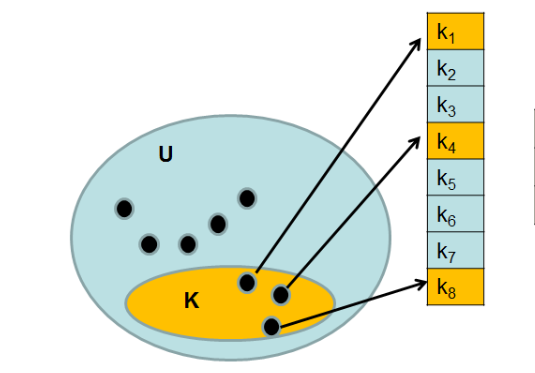" width="300">

<div style='color: forestgreen'>
    <h3>Collisions</h3>
</div>

A **collision** occurs if **two (or more) values have the same hash value**, i.e. given a hash function $h$ and two keys $k1$ and $k2$ such that $k1$ != $k2$ we have :

$$
h(k1) = h(k2)
$$

<div style='color: forestgreen'>
    <h3>Example</h3>
</div>

Let's take a table of capacity 10, to store elements determined by **_integer-valued keys_**.

The hash function is $h(x) = (x \mod 10) + 1$. If the values of the keys to be inserted into the table are **12**, **17**, **29** and **33**, we'll have the following configuration:

<img src=" 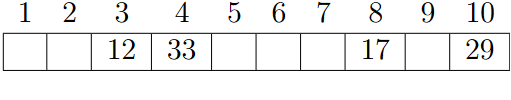" width="300">

> What would happen if we wanted to enter the value 42?

The value **42** will be inserted into the index calculated by _(42 mod 10) + 1_ which gives **3** but there's already a value stored here... It's a **collision**!

To **resolve collisions** we consider two solutions:

- chaining (indirect method)


- computation or open addressing (direct method)

<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>Resolving collisions</h2>
</div>

<div style='color: forestgreen'>
    <h3>Collision resolution by chaining (indirect methods)</h3>
</div>

This technique places all elements with the same hash value in a list.

<img src=" 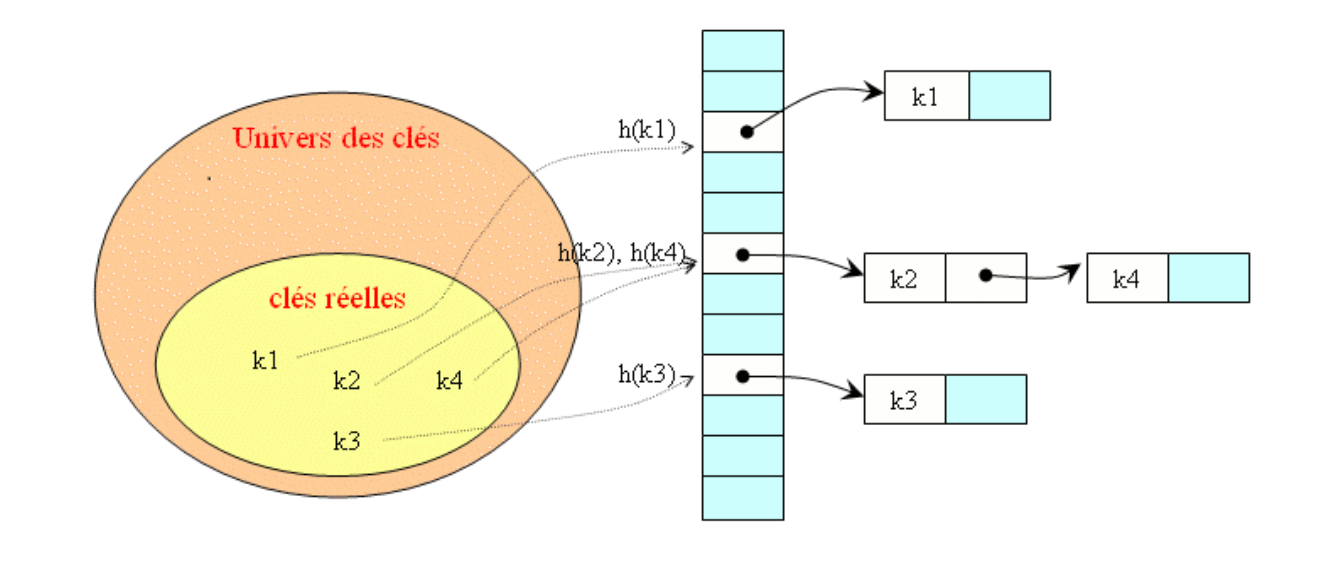" width="500">

To search for an element, simply browse the list whose access is located in the box with index $h(x)$, where $x$ is the element whose **hash value** we're looking for. 

The advantage is that it's easier to program.

There is no (theoretical) limit to the number of keys that can be stored in a list. However, you need to make sure that your hash table is large enough and that your hash function is sophisticated enough to keep the size of your lists small, the aim being to minimize traversals.

Using the following hash function:

$$
h(x) = (x \mod 10) + 1
$$

Let's suppose we enter the values **12**, **17**, **29**, **33**, **42** and **39**.

We'll get the following table (new additions are made at the beginning of the list).

<img src=" 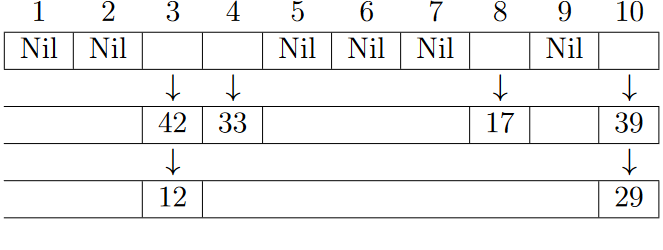" width="400">

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">The <em>NIL</em> value indicated above represents an empty value, it is a constant often used in Algorithmics. In python we designate it as <strong><em>None</em></strong></p>
</div>

In **chaining collision resolution** methods, colliding elements are **chained together**.

- They may be linked outside the array (hashing with separate chaining, see above).


- They may be in an overflow zone (coalescent hashing *outside the program*).

<div style='color: cadetblue'>
    <h4>Hashing with separate chaining</h4>
</div>

As we said, this method chains elements together outside the hash table.

For the following example values :

<img src=" 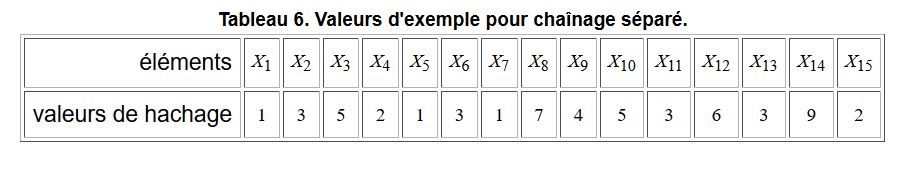" width="350">

<img src=" 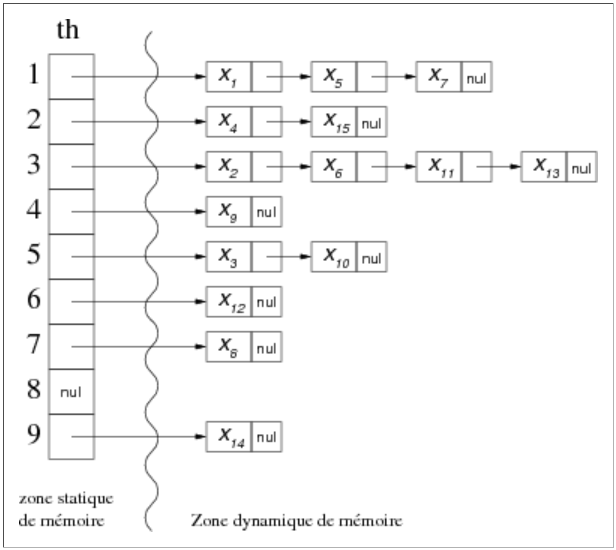" width="350">

What if the colliding elements became so numerous that they constituted a classic list? 

> Searching for an element would be **_O(n)_** complex, and we'd lose all the advantages of hash tables...


If the **distribution function is uniform and adapted to the data collection**, the number of collisions should not be too high. In terms of search (even sequential search), this is quite "tolerable/acceptable".

<div style='color: cadetblue'>
    <h4>Search</h4>
</div>

The search is simple to implement: all we need to do is determine the hash value of the element. In the event of a collision, we compare each element in the list of colliding elements with our value to determine whether or not the value we're looking for exists.

<div style='color: cadetblue'>
    <h4>Add</h4>
</div>

There are two ways to add an element:

- Search for membership of the element to be added, and if it doesn't exist, add it at the end of the collision list (we're already there after the search). This is useful for keeping lists short.


- Add to the first place in the collision list. The advantage is that there's no need for a prior search, which saves time. The disadvantage is longer collision lists (possible duplicates).

<div style='color: cadetblue'>
    <h4>Remove</h4>
</div>

As with adding, there are two possibilities, the choice of which depends on that chosen for adding:

- Search for the element to be deleted and, if it exists in the table, delete it.


- Search for all possible occurrences of the element to be deleted and, if applicable, delete. The main disadvantage is that you must systematically go through the entire collision list.

<div style='color: forestgreen'>
    <h3>Computational collision resolution (direct methods): presentation</h3>
</div>

<div style='color: cadetblue'>
    <h4>Reminder</h4>
</div>

For any key _x_ in a collection of elements of size _m_, the hash function is a uniform function such that $h(x)$ (primary hash value) gives an index, between **_0_** and **_m-1_**.

If several keys have the same hash value, this is called **collision** (primary).

<div style='color: cadetblue'>
    <h4>Definitions</h4>
</div>

Among the methods for resolving collisions, there are the so-called direct methods: **by calculation**. The places of the elements in collision are given by a function of successive trials, which for each _x_ returns in m trials a permutation of the m values taken between **_0_** and **_m-1_**.

<img src=" 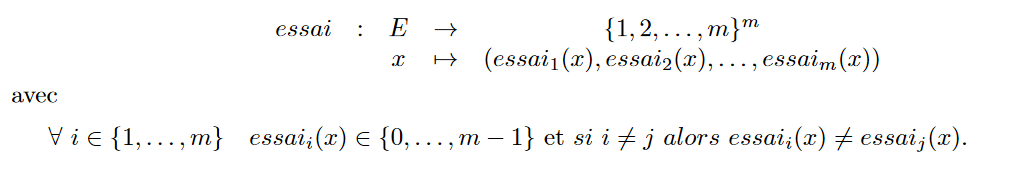" width="600">

<div style="border-color: rgba(40, 167, 70, 0.294); margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid rgba(40, 167, 70, 0.294); border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: rgba(40,167,70,0.1); position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">💡 Information</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">Think of the successive attempts as a <strong>sequence of hash values that we use to be able to classify an element</strong>. We try to place our value at the first index calculated by the hash function. In case of collision we try to place our value at another index (second try), in case of collision we try yet another index (third try) and so on. </p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">Let's illustrate this point by giving ourselves a collection of eight elements (from X1 to X8), for each of which we give all the values of successive trials.</p>
    <p><center><img src=" 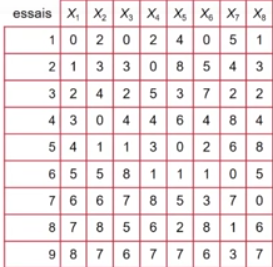"></center></p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
When searching, adding or removing an element these values are not pre-calculated. They are shown here to explain, by way of example, that the fourth tried value for X3 is 4 or that the seventh try of For each Xi, we try all the clues given by its column until we come across a free square.</strong></p>
</div>

The previous example shows that the m test values for a given element are all distinct. All the cells in the hash table can therefore be used for each element.

<div style='color: cadetblue'>
    <h4>For insertion</h4>
</div>

When we want to insert a _x_ element, we start by calculating the value of its first try. In general, this value will correspond to the value returned by the primary **hash**. If the index location corresponding to this value is empty, we place the x there. 

Otherwise, we calculate the value of its second try.
Similarly, if the index location corresponding to this value is empty, x is placed there. Otherwise, we calculate the value of our third try, and so on...

**In fact, as long as we haven't found an empty place to put x, we try again.**

<div style='color: cadetblue'>
    <h4>For search</h4>
</div>

For the search, we look at the boxes corresponding to the various successive trials, until we come across the element we're looking for or an empty box.

<div style='color: cadetblue'>
    <h4>For removal</h4>
</div>

The solution is not to actually delete an element, but to mark the cell it occupies as free: 

Each cell can then be either empty (initial state), occupied or free (has been occupied and then released).

The methods described above must therefore be adapted.

**For search**, simply disregard the free cells (the search continues).

**For insertion**, you keep the first free space you find:

- If such a space exists, we simply insert the element (unless it was already present).


- Otherwise, proceed with "classic" insertion in the first free square encountered.

<div style='color: forestgreen'>
    <h3>Computational collision resolution (direct methods): test functions</h3>
</div>

The various direct hashing methods are characterized by the choice of the **successive trial function**. This associates a sequence of locations in the array. There are at most **_m!_** different sequences in the array, but most methods use far fewer. 

In the following, we present the usual test functions for direct hashing.

<div style='color: cadetblue'>
    <h4>Linear hash</h4>
</div>

Called _probing_ in English, this method is the most intuitive: if there's a collision, starting from the index, we traverse the array until we find a free cell! The indices traversed can be written in the following form, with m the size of the array:

Let $h$ be the hash function :

$essai_{1}(x) = h(x)$

$essai_{2}(x) = h(x) \oplus 1$

$...$

$essai_{i}(x) = h(x) \oplus i-1$

$...$

$essai_{m}(x) = h(x) \oplus m-1$

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    
  The symbol $a \oplus b$ is used to express the addition of _a+b modulo m_. The values calculated never exceed the size of the table. If we add 1 modulo m to the last square, we return to square 0.
  
</div>

<div style='color: cadetblue'>
    <h4>Linear hash: insertion and search example</h4>
</div>

let $g$ be a **hash function** which associates _(3*x + 14) mod 10_ with any _x_.

We insert the values **42**, **0**, **7** and **4**, giving us the following table:

<img src=" 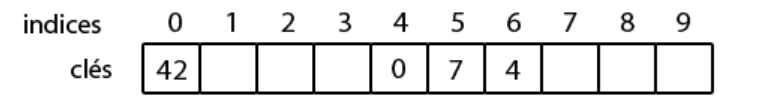" width="600">

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    
 This is an example of a bad hash function. The keys are grouped together in a cluster; ideally, there should be empty cells between **0**, **4** and **7**, **the more the data is dispersed, the better**. 
  
  This lack of uniformity in distribution can lead to serious problems, which we'll discuss shortly. In the meantime, this hash function is just for the example  😃
</div>

Let's go back to our example, and imagine we want to insert the key 22. We have :

$$
g(22) = (3*22+14) mod 10 = (66+14) mod 10 = 80 mod 10 = 0
$$

Since the box at index _0_ is occupied by **42** (collision), we'll check in _1_. It's empty, so we insert **22**.

<img src=" 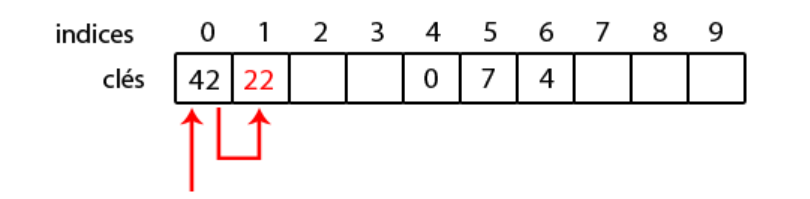" width="600">

Adding the key **30**. We have :
$$
g(30) = (3*30+14)mod10 = 104mod10 = 4
$$

Box _4_ is occupied, so we go through the clues until we find a free box. The first free square is _7_, where we place **30**.

<img src=" 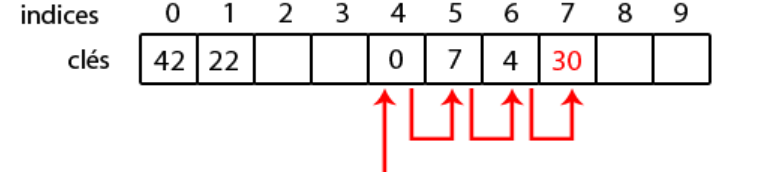" width="600">

To find a key, it's the same principle: we calculate its index, then browse the array (from left to right) until we find the key. If you come across an empty cell, the key doesn't exist (otherwise you'd have found it along the way), and the same applies if you return to the starting point.

<div style='color: cadetblue'>
    <h4>Linear hash: example of deletion</h4>
</div>

Inserting keys is relatively straightforward, but it's deleting them that's tricky and can render the search ineffective, as we mentioned earlier. We'll go through the array until we find the key or an empty cell... If deletion leaves an empty cell on the "path" to be traversed, then access to certain keys will be lost!

For example, let's imagine we simply delete the **7** key, which is at index _5_, after inserting the **30** key.

<img src=" 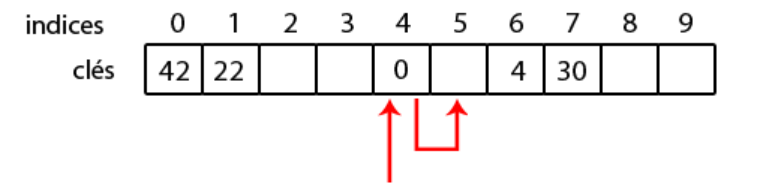" width="600">

As a result, we'll never be able to find 30 (whose primary hash value is 4), as the "path" to it passes through an empty square, at which the program will stop.

We transform the empty square into a free square. So, when you're looking for 30, you'll pass over it without any problems. Just remember, in the method for adding a "key-value" pair, to look for the first empty or marked free square to put an element in.

<img src=" 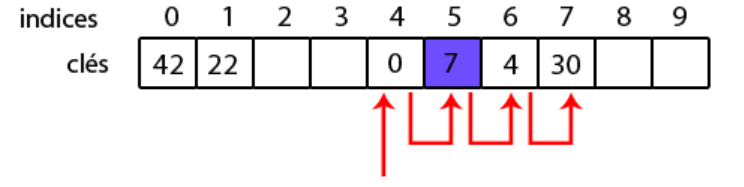" width="600">

<div style="border-color: rgba(40, 167, 70, 0.294); margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid rgba(40, 167, 70, 0.294); border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: rgba(40,167,70,0.1); position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">💡 Information</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">The <strong>linear hashing</strong> system (also called <strong>linear probing</strong>) is simple, does not require additional memory space, but unfortunately suffers from a <em>clustering problem </em> or formation of data clusters concentrated in the same place.</p>
     <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">In fact, the keys will have a tendency to clump together, to form clusters ( clusters) in the table. The problem will come when you have to go through the entire cluster to find an available box or a key, the execution time will skyrocket!</p>
</div>

Taking the example of earlier, if a new key falls at index _4_, it will take 4 tests to find its definitive place. In this case, it's not much, but with arrays of hundreds of thousands or even millions of elements, you'll have to be patient! 

One way of avoiding these clusters is to use a hash that dispatches elements further away than the neighboring square in the event of a collision (as we'll see below). Clusters will still exist, but they will be smaller and more scattered.

<div style="border-color: #fd7e14; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #fd7e14; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #ffedcc; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">🚧 Course questions</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">
        1. Return the hash table to its previous state and re-insert the value <em>7</em>, then delete the value <em>30</em>
    </p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">2. Insert the values <em>11, 30, 14, 22, 26</em> and <em>38</em>
    </p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">3. Which insertion required the most steps? Why?
    </p>
</div>

<div style='color: cadetblue'>
    <h4>
Quadratic Hash</h4>
</div>

One way of avoiding the clustering effect of **linear sampling** is to use **quadratic sampling**: the principle is exactly the same, it's just the shape of the indices that changes.

If $c_{1}$ and $c_{2}$ are constants where $c_{2}$ is non-zero then we define our successive trials function as follows:

Let $h$ be the hash function:


$essai_{i}(x) = h(x) \oplus c_{1}(i-1) \oplus c_{2}(i-1)^{2}$

with m, hash table size_ and i $\in$ $\{0,...,m\}$

<div style='color: cadetblue'>
    <h4>Quadratic hash: example</h4>
</div>

Let's take the previous example and put $c_{1} = 0$ and $c_{2} = 1$.

We take our function $g : x \rightarrow (3*x+14) \mod 10$ and assume that the values **42**, **0**, **7** and **4** are already in the table.

<img src=" 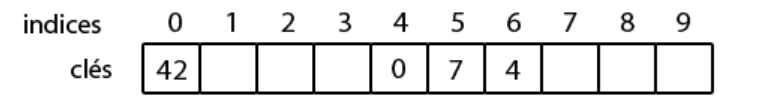" width="600">

Let's try inserting **22** whose hash code is _0_.

- The first attempt calculates $essai_{1}(22)$ = g(22) = 0, but there's a collision with **42**.
- On the second try, we calculate $essai_{2}(22)$ = $(g(22) + c_{1}*1 + c_{2}*1²) \mod m$ = $(0 + 0 + 1*1²) \mod m = 1$.

We therefore place **22** in _1_.

Let's try inserting **30** whose hash code is _4_.

- The first attempt calculates $essai_{1}(30)$ = g(30) = 4, but there's a collision with **0**.
- On the second try, we calculate $essai_{2}(30)$ = $(g(30) + c_{1}*1 + c_{2}*1²) \mod m$ = $(4 + 0 + 1²) \mod m = 5$.

but there's a collision with **7**.

- On the third try we calculate $essai_{3}(30)$ = $(g(30) + c_{1}*2 + c_{2}*2²) \mod m$ = $(4 + 0 + 2²) \mod m = $8

We therefore place **30** in _8_.

<img src=" 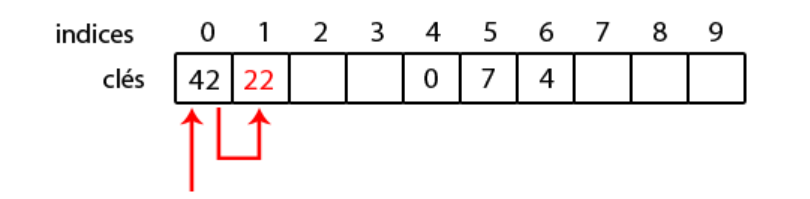" width="600">

<div style="border-color: rgba(40, 167, 70, 0.294); margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid; border-left: .2rem solid rgba(40, 167, 70, 0.294); border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: rgba(40,167,70,0.1); position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">💡 Information</p>
    <p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">Quadratic sampling works much better than linear sampling, the formation of clusters is less. So, in the example, key 30 does not join the cluster formed by 0, 7 and 4.</p>

<p style="padding: 0 1.4rem; margin-top: .4em; margin-bottom: 0; font-size: 1em;">On the other hand, problems will appear when we have two keys whose hash code is the same. Indeed, they will both take the same path. For example, if for a key the hash code is 4, as in the case of key 30 you will have to go through the indices 4, 5 and 8 before arriving at 3...

In the event of collisions in a quadratic survey, we say that the keys will form **secondary clusters**. They are less important than linear survey clusters because they are more scattered, but they remain problematic.</p>
    
</div>

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    
There is another method of managing **successive trials** which is called **double hashing**: we will search for the first available box using the primary hash and in the event of a collision, use an arithmetic relation involving an index i. However, we will not just increment it, **we will also hash it**.

Double hashing is not in the program but it has the advantage of being more robust because it avoids clusters.
</div>

<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>Data importance, load factor and complexity</h2>
</div>

<div style='color: forestgreen'>
    <h3>On the importance of data</h3>
</div>

As we have seen, each collision method has its advantages and disadvantages, but they all risk degenerating in certain situations. Hence an essential rule: **if you have the possibility, obtain as much information as possible about the data that will be inserted into your hash table**.

Indeed, the more information you have, the more you will have the means to better store information! For example, some hash functions will perform better with certain key types than others....

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #e7f2fa; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700;">📝 Note</p>
    
  Before continuing, a quick reminder of the problematic situations for each **collision management method** (assuming that the hash function has no influence):

- For **linear survey**, the more the table fills up, the more clusters will form;

- For **separate chaining**, the more elements there are, the longer the lists are likely to be.
</div>

<div style='color: forestgreen'>
    <h3>Load factor</h3>
</div>

The **load factor** or **fill factor** of a hash table of size $m$ with $n$ keys defined, is denoted $\alpha$ and is defined by the relation :

$$
\alpha = \frac {n} {m}
$$

For example, let's take the table from earlier:

<img src=" 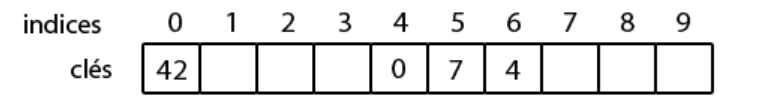" width="600">

There are ten boxes, four of which are occupied, the load factor will then be:

$$
\frac {4} {10} = 0.4
$$

This also applies to arrays with lists (linear chaining).

<img src=" 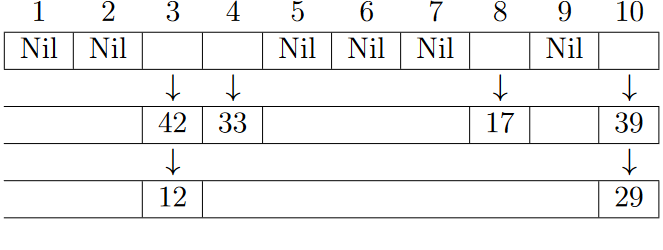" width="400">

There are still ten boxes, but we count the 6 keys that are stored in lists: the load factor is therefore 0.6.

The load factor is therefore an indicator of how full the table is: **the closer it is to 1 (100%), the fewer free slots there will be and the longer execution times will be**.

<div style='color: forestgreen'>
    <h3>Complexity</h3>
</div>

<div style="border-color: #007bff; margin: 1.5625em auto; padding: 0 .6rem .8rem !important; overflow: hidden; page-break-inside: avoid;border-left: .2rem solid #007bff; border-radius: .1rem; box-shadow: 0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition: color .25s,background-color .25s,border-color .25s;">
    <p style="background-color: #007bff; position: relative; margin: 0 -.6rem !important; padding: .4rem .6rem .4rem 2rem; font-weight: 700; color: white">📝 Theorem</p>
    
The average cost of searching (positively or negatively) for a random key in a randomly constructed hash table where collisions are resolved by chaining, is Θ(1+α) 

_With α being the load factor and under the assumption of simple uniform hashing for the hash function on all keys_.

</div>

<div class="alert alert-block alert-info" style='color:white; background-color:blue; border-color: blue; '>
    <h2>Conclusion about hashing methods</h2>
</div>

All hashing methods are well suited to static sets. They are roughly equivalent at low fill rates.


- Linear hashing** is the slowest, but has the advantage of being extremely simple to implement.


- With the exception of separate chaining, hashing methods are not very resistant to deletion. The solution of using a marking system (empty, free, occupied) considerably increases search times.